In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Part 1

In [2]:
from numpy import loadtxt
df = pd.read_csv('breast-cancer.csv', header = None)
df.columns = loadtxt('field_names.txt', dtype = str, delimiter=',', unpack=False)

In [3]:
df.columns

Index(['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst',
       'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean',
       'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error',
       'area_worst', 'smoothness_mean', 'smoothness_sd_error',
       'smoothness_worst', 'compactness_mean', 'compactness_sd_error',
       'compactness_worst', 'concavity_mean', 'concavity_sd_error',
       'concavity_worst', 'concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error',
       'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
df.head(15)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


We can make inferences based on the numerical features, although we only have access to the actual column names and the numerical values. If I were curating this dataset I would be sure to include a README that had descriptions of each variable and the units in which they are measured. The obvious step to take is to transform the 'diagnosis' column from discrete values of "B" and "M" to 0 and 1 for classification, as well as standard data cleaning tasks like checking for missing and incorrectly imputed values

In [5]:
df[df.isnull().any(axis=1)]

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst


In [6]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [7]:
df.loc[df['diagnosis'] == 'B', 'diagnosis'] = 0
df.loc[df['diagnosis'] == 'M', 'diagnosis'] = 1

df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [8]:
malignant = df[df['diagnosis'] == 1]
benign = df[df['diagnosis'] == 0]
m_mean = malignant['smoothness_mean'].mean()
m_median = malignant['smoothness_mean'].median()
b_mean = benign['smoothness_mean'].mean()
b_median = benign['smoothness_mean'].median()

print('Malignant mean smoothness ' + str(m_mean))
print('Malignant median smoothness ' + str(m_median))
print('Benign mean smoothness ' + str(b_mean))
print('Benign median smoothness ' + str(b_median))

Malignant mean smoothness 4.3239292452830185
Malignant median smoothness 3.6795
Benign mean smoothness 2.0003212885154062
Benign median smoothness 1.851


In [9]:
malignant = df[df['diagnosis'] == 1]
benign = df[df['diagnosis'] == 0]
m_mean = malignant['compactness_mean'].mean()
m_median = malignant['compactness_mean'].median()
b_mean = benign['compactness_mean'].mean()
b_median = benign['compactness_mean'].median()

print('Malignant mean compactness ' + str(m_mean))
print('Malignant median compactness ' + str(m_median))
print('Benign mean compactness ' + str(b_mean))
print('Benign median compactness ' + str(b_median))

Malignant mean compactness 0.03228116509433963
Malignant median compactness 0.02859
Benign mean compactness 0.021438246498599437
Benign median compactness 0.016309999999999998


Insofar as we can treat the in-sample mean from one person as representative of the smoothness and compactness (we can certainly buy "means of means" for free but "medians of means" is a bit tricker), it is very easy to identify right skew in the data. This is sensible as the data is bounded below by zero, and "more is worse" in both categories. In order to conduct a parametric test for their difference, we would need to A) determine what probability distribution each of these marginal distributions follow (we could calculate the AIC for different families of distributions for goodness of fit) and then B) assuming both distributions come from the same family, perform the corresponding parametric test. Similarly, if we have any kind of historical precedent that would give us an informative prior, we could form posterior estimates of each distribution for comparison. We could also non-parametrically test using the Kolmogorov-Smirnov test which, conveniently, comes out of the box in scipy.

In [10]:
df.corr().sort_values(by='diagnosis', ascending=False)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
fractal_dimension_mean,0.035174,0.793566,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,...,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114
concave_points_sd_error,0.079986,0.782914,0.965137,0.358040,0.970387,0.959120,0.238853,0.590210,0.729565,0.855923,...,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
perimeter_sd_error,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
concavity_worst,0.082405,0.776454,0.969539,0.352573,0.969476,0.962746,0.213120,0.535315,0.688236,0.830318,...,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492
radius_worst,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
concave_points_worst,0.107187,0.733825,0.941082,0.343546,0.941550,0.959213,0.206718,0.509604,0.675987,0.809630,...,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
perimeter_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930


The three columns most strongly correlated with diagnosis are the mean fractal dimension, the standard error in the number of concave points, and the standard error in cell perimeter. These are all logical- the fractal dimension measures the irregularity of the shape, and the two standard errors indicate high irregularity from cell to cell which is essentially what cancer is. We should also note that there are some very high correlates with each of these- i.e. that it may not in fact be the standard error of the number of concave points volatility that is driving the diagnosis, but that high concentrations of concave points on individual cells can drastically increase the standard error. This will especially be important when we focus on model selection.

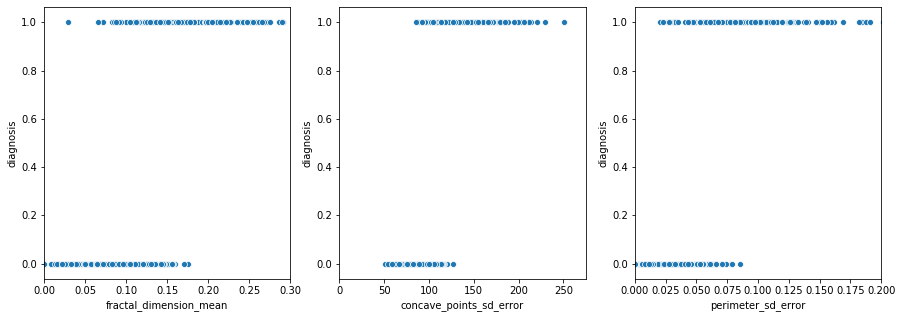

In [11]:
plt.figure(figsize = (15,5))

plt.subplot(1,3,1)
plt.xlim(0,.3)
sns.scatterplot(x = 'fractal_dimension_mean', y = 'diagnosis', data = df)

plt.subplot(1,3,2)
plt.xlim(0,275)
sns.scatterplot(x = 'concave_points_sd_error', y = 'diagnosis', data = df)

plt.subplot(1,3,3)
plt.xlim(0,.2)
sns.scatterplot(x = 'perimeter_sd_error', y = 'diagnosis', data = df)

plt.show()

There is some diagnosis heterogeneity in the highest concentrations of data for each feature, but it is also quite evident that there exists a cutoff value beyond which a malignant diagnosis is essentially guaranteed. In essence, these are all measurements of cell irregularity, and the highest concentrations of most irregular cells is what should correspond to a cancer diagnosis.

In [12]:
def bootstrap(data, sample_size=None):
    ''' Resamples dataframe
    ---
    data: an array-like object
    sample_size: int, defaults to length of data
    ---
    Returns an array of resampled data
    '''
    if sample_size == None:
        sample_size = len(data)
        
    resample_mask = np.floor(np.random.rand(sample_size)*len(data)).astype(int)
    resampled_data = data.iloc[resample_mask,:]
    return resampled_data

## you can also call the pandas sample method and specify to allow for sampling with replacement

In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

X, y = df.drop(['ID','diagnosis'], axis=1), df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)

clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
importances = list(zip(clf.feature_importances_,X.columns))
print(sorted(importances))
print("Test score: " + str(clf.score(X_test,y_test)))

[(0.0018765120324902575, 'smoothness_worst'), (0.002199940293978231, 'compactness_sd_error'), (0.0030120102006312138, 'texture_worst'), (0.003470214102441216, 'area_mean'), (0.0035105408714918357, 'concavity_sd_error'), (0.004296137521666896, 'concavity_mean'), (0.004980781923150218, 'texture_sd_error'), (0.005588711569454448, 'compactness_worst'), (0.00638153680488883, 'perimeter_worst'), (0.006452687604439232, 'smoothness_mean'), (0.006468759491352339, 'fractal_dimension_sd_error'), (0.006678417712610977, 'compactness_mean'), (0.0069221161150631065, 'symmetry_sd_error'), (0.007282397731852938, 'texture_mean'), (0.0075984656444693195, 'concave_points_worst'), (0.008463981895808865, 'radius_worst'), (0.009829772958751612, 'symmetry_worst'), (0.010036679214868094, 'symmetry_mean'), (0.01048704273923532, 'radius_sd_error'), (0.010677163738567188, 'area_worst'), (0.011907262510403149, 'concave_points_mean'), (0.01266880805142646, 'fractal_dimension_worst'), (0.017294973764499618, 'radius_

/home/christian/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [14]:
gbclf = GradientBoostingClassifier(random_state=0)
gbclf.fit(X_train,y_train)
importances = list(zip(gbclf.feature_importances_,X.columns))
print(sorted(importances))
print("Test score: " + str(gbclf.score(X_test,y_test)))

[(0.00010035585767076977, 'radius_mean'), (0.00019785487304871152, 'compactness_worst'), (0.0002167871042940179, 'radius_worst'), (0.000314255818045529, 'texture_mean'), (0.00048434210749671007, 'compactness_mean'), (0.0007877497685626858, 'fractal_dimension_worst'), (0.0008090234216433204, 'area_worst'), (0.0008424250016017845, 'smoothness_mean'), (0.001104317641770098, 'concavity_sd_error'), (0.0011851362381262937, 'texture_worst'), (0.001216723927165791, 'concavity_mean'), (0.0016563746296364538, 'area_mean'), (0.0017365975272164145, 'texture_sd_error'), (0.0025217828603183016, 'symmetry_mean'), (0.002704142369543945, 'compactness_sd_error'), (0.004686518682444832, 'area_sd_error'), (0.006104517358122509, 'smoothness_worst'), (0.006183118041807762, 'symmetry_sd_error'), (0.006362650354227323, 'radius_sd_error'), (0.008744729126347979, 'perimeter_mean'), (0.01127984411685147, 'perimeter_worst'), (0.013383269825861856, 'fractal_dimension_sd_error'), (0.015491296283167704, 'concave_poi

Given the width of the data and the collinearities in the dataset I opted to use two ensemble methods instead of logistic regression or support vector machine for classification. With more time I would create a pipeline for logistic regression with subset selection to compare to the ensemble methods, though the fit for both models is extremely good on the test data with a 2:1 train/test split. This split is a preliminary tactic to prevent overfitting, and we could further tune hyperparameters for the classification models using the RandomSearch and/or GridSearch modules from sklearn.

That being said, the test score alone isn't a good enough metric for classification problems, and trying to do something with the gravity of predicting the presence of cancer is evidentiary therein- we *really* don't want to predict that people with cancer don't have it and vice versa.

In [15]:
from sklearn.metrics import f1_score, confusion_matrix

print('Random Forest F1: ' + str(f1_score(y_test,clf.predict(X_test))))
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, clf.predict(X_test)))
print('Gradient Boost F1: ' + str(f1_score(y_test,gbclf.predict(X_test))))
print('Gradient Boost Confusion Matrix: ')
print(confusion_matrix(y_test, gbclf.predict(X_test)))

Random Forest F1: 0.9147286821705426
Random Forest Confusion Matrix:
[[118   3]
 [  8  59]]
Gradient Boost F1: 0.9696969696969696
Gradient Boost Confusion Matrix: 
[[120   1]
 [  3  64]]


The F1 scores are also both extremely good for both models, and the confusion matrices show in particular almost no false positives with slightly more false negatives. As for the feature importances, for ensemble methods they are easy to extract using methods within each scikit-learn package. One common criticism for ensemble methods is that they are "black boxes"- we can't interpret the feature importance scores as cleanly as we can for the R squared from OLS regression. In particular, the feature importances are extremely flat in the random forest model, and the interpretability is low given how the scores deviate from the correlations (in particular, smoothness standard error scores highest while only having moderate correlation). Meanwhile, we buy ~75 percent of the explanatory power of the gradient boost model using the three features that correlate most strongly with diagnosis.


To a technical audience, I would explain that given the use of ensemble methods we don't have clean coefficients for interpreting the effect of unit changes in features on the log-likelihood of the diagnosis, and that all of the models here had no hyperparameter tuning. Additionally, the given train-test split produced an excellent model, but we should certainly cross-validate before moving forward on action steps. The F1 score and the examination of the confusion matrix makes me extremely confident in the efficacy of the gbm for making predictions, but we are limited to just the data we have access to and we need *a lot* more and from more globally representative samples.

To a non-technical audience, I would begin by explaining that the model employed is iterative, and that it begins with weak predictions and, over time, learns to make good predictions by using the best components of the weak predictions and averaging across thousands of steps to give us confidence that we don't fall into certain holes. I would reiterate the constraints of the traditional regression models- that we are relying on one unique solution that is highly sensitive to small changes in variable selection and individual outliers, rather than attempting many solutions and seeing what sticks. In particular, because we have some very strong indicators of cancer in our data set, the model is excellent at matching up diagnoses with key cellular conditions. In particular, I would try to focus on the fact that the cells in the human body are supposed to vary in size, shape, density, etc., but that in a non-cancerous person we should observe much less variability from cell to cell. When we observe volatility in cellular thickness and complexity (fractal dimension), irregular patterns (concave points), and lots of variation in size, we are essentially staring cancer in the face, and that is specifically what our model has learned- to match a diagnosis with high enough concentrations of these various irregularities.

# Part 2

#### Student sample 1

The first thing that jumps out is that the student has done a good job of commenting out code, and appears to have a good conceptual understanding of how the linear regression model works (i.e. we have some values that we want to use to predict other values). I would begin by identifying that the student has mismatched 'd' and 'data' due to the ambiguity. I would instruct them to use something specific to the problem like "salary_data" or "contract_data" as the name of the dataframe. In the #Setup for data prediction # section, they appear to be creating a pandas Series called x1 and a pandas Dataframe called x2. I would encourage them to use the stylization of data['SalaryNormalized'] to help distinguish between the methods being called in the code and the assignment and creation of data, and I would also indicate that "X and y" might be better fits as names than x1 and x2 in order to better keep track of the model. (There are further issues with data types and cleanliness that I highlight at length below. If it were in-person feedback, I would try to get everything else I mention here in order first before moving on to "why won't this file execute?")

While evaluating what the student intends to do with their model, I would start by asking questions related to the creation of dummy variables for the categorical contract types. As written, they are calling the cross_val_score function to check the fit of regressing salary onto the feature matrix of contract types. I would first discuss the scope of the problem with them- are they interested in learning more about salary, or are they interested in predicting types of contracts? If it is the latter, then the linear regression model is misspecified. If it's the former, I would ask them A) what they think the cv = 1 hyperparameter will do and B) why they have specified mean absolute error as the scoring metric. I would then review the concept of K-fold cross validation (reminding them to think about the length of their data set while choosing K) and whether or not MSE would be a better metric than MAE. I would also ask about their import statement for the train_test_split package, and remind them that if they intend to use it they can pass it into the cv argument of the cross_val_score function. I would also remind them that import statements in an executable .py file are all supposed to be called at the head of the file, and that they have already in fact imported cross_val_score so that line 20 is redundant.

#### Student sample 2

I would begin my feedback by letting the student know they did a fantastic job of organizing the head of the file with import statements and that their commenting makes the code very easy to read. I would also encourage this student to use the convention of data['SalaryNormalized'] to distinguish between assignments of data structures and calling methods, and again to use a more specific name for the dataframe than "data."

I would then ask the student about the X and y in question. Some cursory examination of the SalaryNormalized column shows that it averages provided salary ranges. That being said, the data is very raw- do we know all the ranges are int or float64, for example? There may be missing values to tackle as well.

Similarly for the X dummy matrix generated, we need to ensure that we don't create so many categories that the regression problem becomes far too sparse to say anything meaningful. Are there NaN values? Are there any mismatched strings? if the data is perfectly clean then this will certainly run, but my concern from the outset is that it won't.

Finally, I would address the hyperparameters of the cross_val_score call in line 20. Why is 5-fold validation the choice, and why is MAE our scoring metric? 